# Credit Card Fraud Detection

**Objective**: Detect credit card fraud by using clustering and anomalies detection.

*Dataset*: https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection

## Inicialization

### Imports

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_extraction import FeatureHasher
from sklearn.decomposition import PCA

### Visual config

In [8]:
%matplotlib inline
plt.style.use('Solarize_Light2')
sns.set(style='darkgrid', palette='colorblind')

## Data Visualization

In [10]:
df = pd.read_csv('bank_transactions_data_2.csv')

In [11]:
df.shape

(2512, 16)

In [12]:
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18,Student,172,1,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37,Doctor,139,1,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67,Retired,291,1,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51,Engineer,86,1,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55,Doctor,120,1,1021.88,2024-11-04 08:06:32


In [13]:
df.drop('TransactionID', axis=1, inplace=True)

In [14]:
df['LoginAttempts'].value_counts()

LoginAttempts
1    2390
5      32
4      32
3      31
2      27
Name: count, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                2512 non-null   object 
 1   TransactionAmount        2512 non-null   float64
 2   TransactionDate          2512 non-null   object 
 3   TransactionType          2512 non-null   object 
 4   Location                 2512 non-null   object 
 5   DeviceID                 2512 non-null   object 
 6   IP Address               2512 non-null   object 
 7   MerchantID               2512 non-null   object 
 8   Channel                  2512 non-null   object 
 9   CustomerAge              2512 non-null   int64  
 10  CustomerOccupation       2512 non-null   object 
 11  TransactionDuration      2512 non-null   int64  
 12  LoginAttempts            2512 non-null   int64  
 13  AccountBalance           2512 non-null   float64
 14  PreviousTransactionDate 

In [16]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [17]:
df.isnull().sum()

AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

### Feature Analysis

#### Histplots

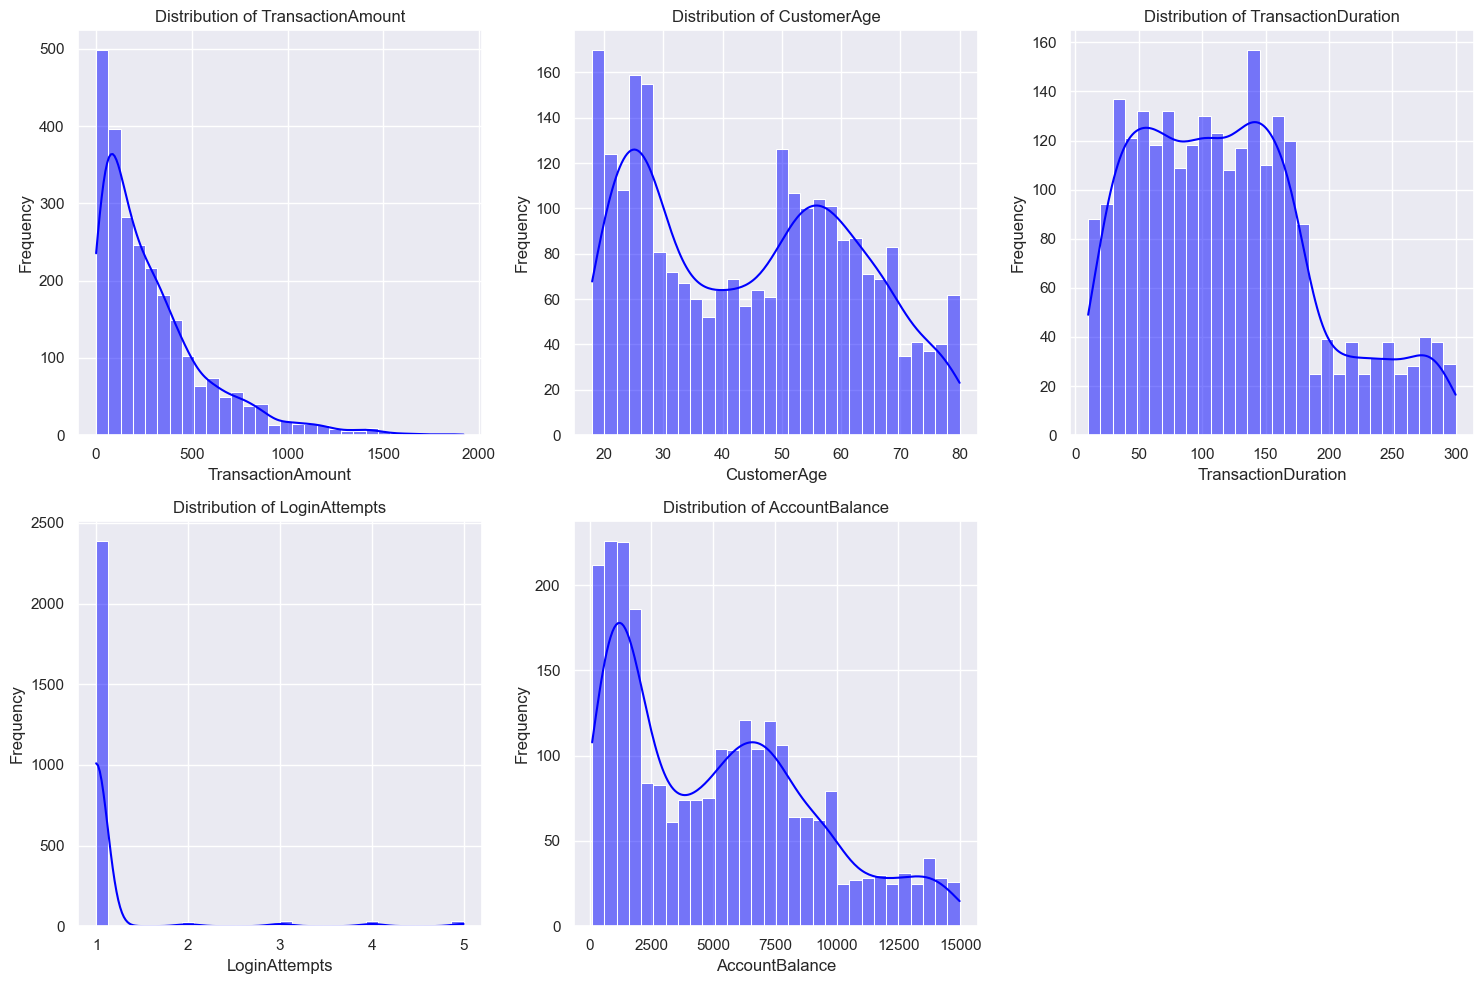

In [20]:
num_vars = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, var in enumerate(num_vars):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[var], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Boxplots

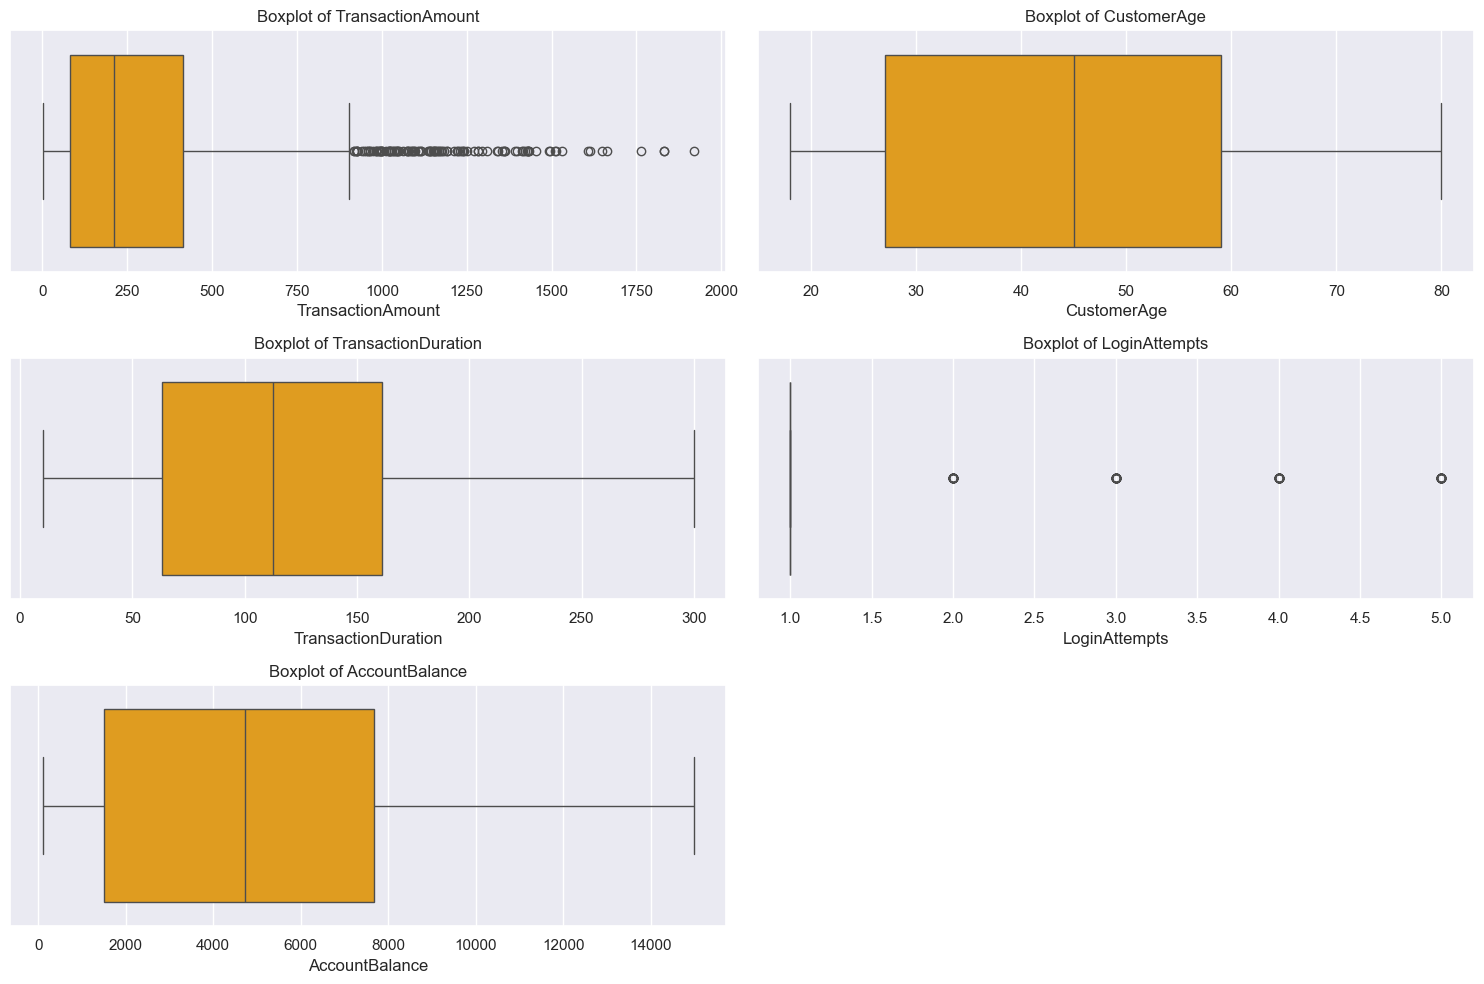

In [22]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(num_vars):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[var], color='orange')
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)
plt.tight_layout()
plt.show()

### Exploring Login Attempts

Values different from 1 are outliers. Let's explore them in detail.

#### Separating LoginAttempts outliers

In [26]:
single_attempts = df[df['LoginAttempts'] == 1]
multiple_attempts = df[df['LoginAttempts'] > 1]

print(f"Single Attempt Transactions: {len(single_attempts)}")
print(f"Multiple Attempt Transactions: {len(multiple_attempts)}")

Single Attempt Transactions: 2390
Multiple Attempt Transactions: 122


#### Comparing descriptive stats

In [28]:
print("Stats - Single Attempt Transactions:")
single_attempts.describe()

Stats - Single Attempt Transactions:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2390.000000,2390.000000,2390.000000,2390.0,2390.000000
mean,298.027054,44.648536,119.128033,1.0,5094.212556
std,292.775303,17.753802,69.812674,0.0,3879.741981
min,0.260000,18.000000,10.000000,1.0,101.250000
25%,81.180000,27.000000,63.000000,1.0,1504.727500
50%,211.270000,45.000000,111.000000,1.0,4732.690000
75%,416.247500,59.000000,161.000000,1.0,7626.912500
max,1919.110000,80.000000,300.000000,1.0,14977.990000


In [29]:
print("Stats - Multiple Attempt Transactions:")
multiple_attempts.describe()

Stats - Multiple Attempt Transactions:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,122.000000,122.000000,122.000000,122.000000,122.000000
mean,289.105820,45.172131,129.737705,3.565574,5507.877377
std,276.205495,18.597384,72.417842,1.105865,4293.692101
min,1.930000,18.000000,11.000000,2.000000,271.780000
25%,95.695000,27.250000,75.500000,3.000000,1467.937500
50%,203.625000,47.000000,127.500000,4.000000,4974.550000
75%,372.802500,59.750000,166.750000,5.000000,8412.622500
max,1531.310000,80.000000,291.000000,5.000000,14851.280000


#### Binary Codification

In [31]:
df['LoginAttempts_Binary'] = df['LoginAttempts'].apply(lambda x: 'Single' if x == 1 else 'Multiple')

df['LoginAttempts_Binary'].value_counts()

LoginAttempts_Binary
Single      2390
Multiple     122
Name: count, dtype: int64

#### Visualising Boxplots

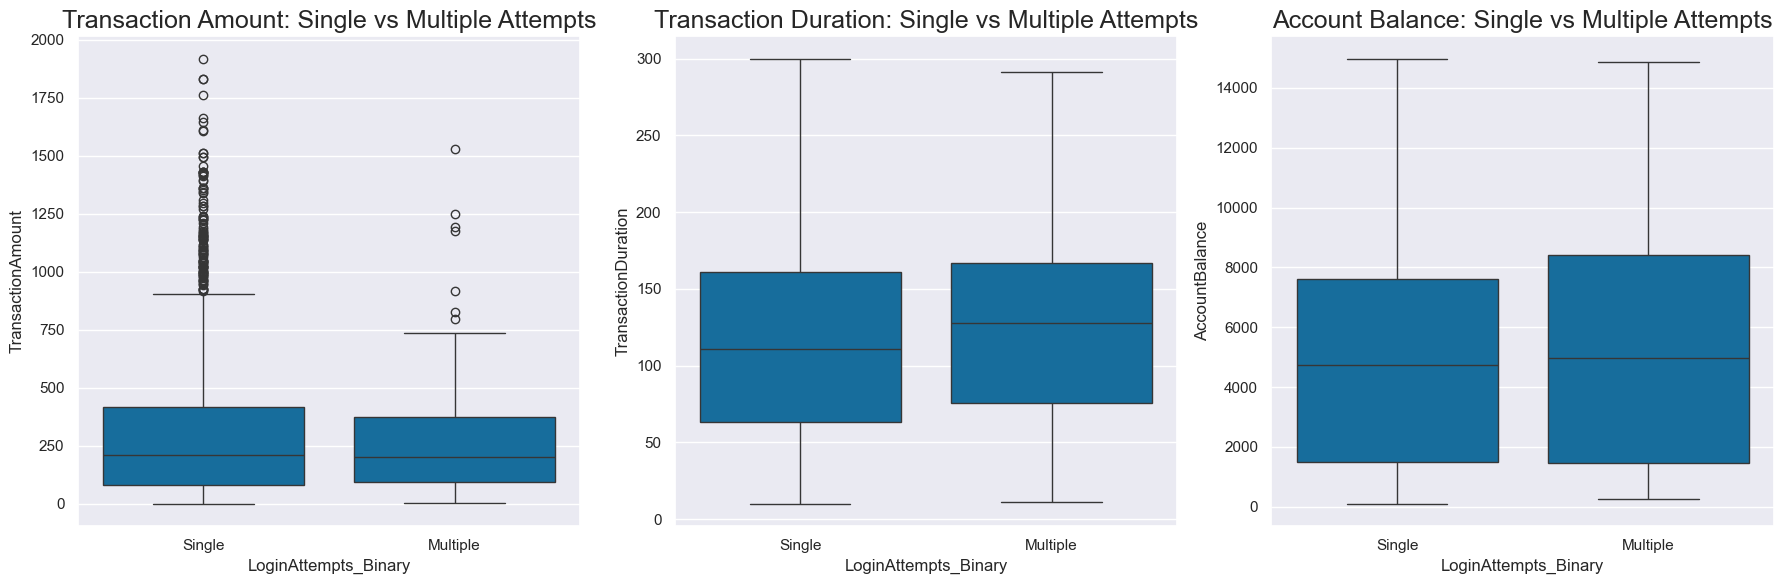

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# TransactionAmount
sns.boxplot(x='LoginAttempts_Binary', y='TransactionAmount', 
            data=df, ax=axes[0])
axes[0].set_title("Transaction Amount: Single vs Multiple Attempts", fontsize=18)

# TransactionDuration
sns.boxplot(x='LoginAttempts_Binary', y='TransactionDuration', 
            data=df, ax=axes[1])
axes[1].set_title("Transaction Duration: Single vs Multiple Attempts", fontsize=18)

# AccountBalance
sns.boxplot(x='LoginAttempts_Binary', y='AccountBalance', 
            data=df, ax=axes[2])
axes[2].set_title("Account Balance: Single vs Multiple Attempts", fontsize=18)

plt.tight_layout()
plt.show()

#### Correlation Matrix

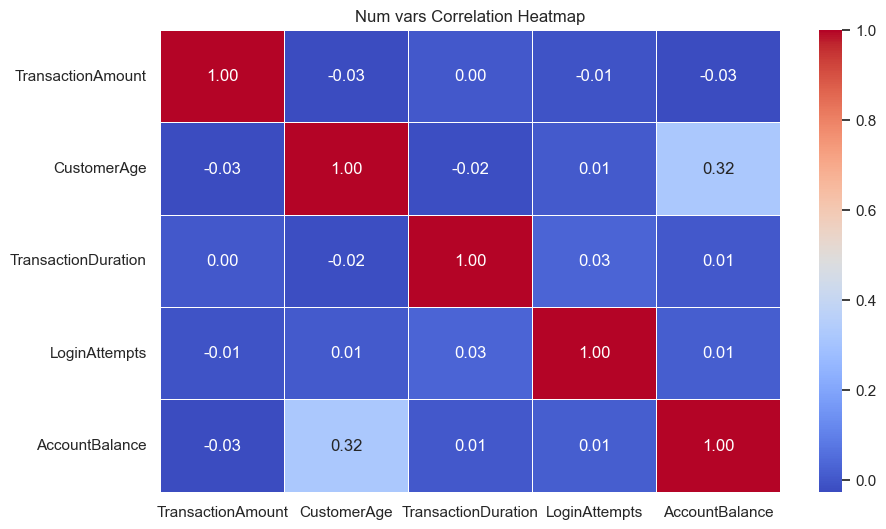

In [35]:
correlation_matrix = df[["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Num vars Correlation Heatmap")
plt.show()


There isn't much correlation between variables and there isn't a significant difference between Single and Multiple Attempts regarding to the range of the boxplots.

In [37]:
df.drop('LoginAttempts_Binary', axis=1, inplace=True)

## Feature Engineering

### Categories Treatment

#### Frecuency

In [41]:
cat_vars = df.select_dtypes(include='object')

for var in cat_vars:
    print(f"Frecuencia de categorías en '{var}':")
    print(df[var].value_counts(normalize=True).head(10))
    print("-" * 50)

Frecuencia de categorías en 'AccountID':
AccountID
AC00362    0.004777
AC00363    0.004777
AC00202    0.004777
AC00460    0.004777
AC00257    0.004379
AC00456    0.004379
AC00304    0.004379
AC00480    0.004379
AC00225    0.004379
AC00267    0.003981
Name: proportion, dtype: float64
--------------------------------------------------
Frecuencia de categorías en 'TransactionDate':
TransactionDate
2023-04-11 16:29:14    0.000398
2023-12-15 16:38:43    0.000398
2023-03-20 16:02:51    0.000398
2023-11-15 17:32:11    0.000398
2023-09-11 17:52:59    0.000398
2023-07-27 17:51:27    0.000398
2023-10-13 16:05:10    0.000398
2023-07-10 16:41:50    0.000398
2023-10-27 17:53:06    0.000398
2023-07-03 16:38:45    0.000398
Name: proportion, dtype: float64
--------------------------------------------------
Frecuencia de categorías en 'TransactionType':
TransactionType
Debit     0.773885
Credit    0.226115
Name: proportion, dtype: float64
--------------------------------------------------
Frecuencia de

#### Codifications

**One-Hot Encoding**:
* TransactionType 
* Channel
* CustomerOccupation

**Hashing Encoding**:
* AccountID
* DeviceID
* IP Address
* MerchantID

**Target Encoding**:
* Location

**Time Transformation**:
* TransactionDate
* PreviousTransactionDate

In [44]:
df_encoded = df.copy()

#### 1. Hashing Encoder

In [46]:
hash_columns = ['AccountID', 'DeviceID', 'IP Address', 'MerchantID']
n_features = 8  # Hashing num features

for col in hash_columns:
    hasher = FeatureHasher(n_features=n_features, input_type='string')
    hashed_features = hasher.transform(df_encoded[[col]].astype(str).apply(lambda x: [x.iloc[0]], axis=1)).toarray()
    hashed_df = pd.DataFrame(hashed_features, columns=[f"Hash_{col}_{i}" for i in range(n_features)])
    df_encoded = pd.concat([df_encoded.drop(columns=[col]), hashed_df], axis=1)

#### 2. One-Hot Encoding

In [48]:
ohe_columns = ['TransactionType', 'Channel', 'CustomerOccupation']
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_ohe = ohe.fit_transform(df_encoded[ohe_columns])

ohe_df = pd.DataFrame(encoded_ohe, columns=ohe.get_feature_names_out(ohe_columns))
df_encoded = pd.concat([df_encoded.drop(columns=ohe_columns), ohe_df], axis=1)

#### 3. Target Encoding by using TransactionAmount as the target

In [50]:
target_col = 'TransactionAmount'
location_means = df_encoded.groupby('Location')[target_col].mean()
df_encoded['Location'] = df_encoded['Location'].map(location_means)
df_encoded['Location'] = df_encoded['Location'].fillna(df_encoded['Location'].mean())

#### 4. Date vars transformation

In [52]:
date_cols = ['TransactionDate', 'PreviousTransactionDate']

for col in date_cols:
    df_encoded[col] = pd.to_datetime(df_encoded[col], errors='coerce')  # Converting to datetime
    df_encoded[f'{col}_DayOfWeek'] = df_encoded[col].dt.dayofweek       # Day of the week (0=Monday)
    df_encoded[f'{col}_Hour'] = df_encoded[col].dt.hour                 # Hour
    df_encoded[f'{col}_DaysSince'] = (df_encoded[col] - df_encoded[col].min()).dt.days  # Date difference
    df_encoded.drop(columns=[col], inplace=True)  # Eliminating original columns

In [53]:
df_encoded.iloc[0]

TransactionAmount                      14.090000
Location                              325.803559
CustomerAge                            70.000000
TransactionDuration                    81.000000
LoginAttempts                           1.000000
AccountBalance                       5112.210000
Hash_AccountID_0                        0.000000
Hash_AccountID_1                        0.000000
Hash_AccountID_2                        1.000000
Hash_AccountID_3                        0.000000
Hash_AccountID_4                        0.000000
Hash_AccountID_5                        0.000000
Hash_AccountID_6                        0.000000
Hash_AccountID_7                        0.000000
Hash_DeviceID_0                         0.000000
Hash_DeviceID_1                        -1.000000
Hash_DeviceID_2                         0.000000
Hash_DeviceID_3                         0.000000
Hash_DeviceID_4                         0.000000
Hash_DeviceID_5                         0.000000
Hash_DeviceID_6     

In [54]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   TransactionAmount                  2512 non-null   float64
 1   Location                           2512 non-null   float64
 2   CustomerAge                        2512 non-null   int64  
 3   TransactionDuration                2512 non-null   int64  
 4   LoginAttempts                      2512 non-null   int64  
 5   AccountBalance                     2512 non-null   float64
 6   Hash_AccountID_0                   2512 non-null   float64
 7   Hash_AccountID_1                   2512 non-null   float64
 8   Hash_AccountID_2                   2512 non-null   float64
 9   Hash_AccountID_3                   2512 non-null   float64
 10  Hash_AccountID_4                   2512 non-null   float64
 11  Hash_AccountID_5                   2512 non-null   float

### Scaling

StandardScaler was used for K-Means, GMM and Isolation Forest. MinMaxScaler for DBSCAN.

In [57]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_encoded, test_size=0.2, random_state=42)

# Scaling each dataset separately
scaler_standard = StandardScaler()
train_scaled_standard = pd.DataFrame(scaler_standard.fit_transform(train_data), columns=train_data.columns)
test_scaled_standard = pd.DataFrame(scaler_standard.transform(test_data), columns=test_data.columns)

scaler_minmax = MinMaxScaler()
train_scaled_minmax = pd.DataFrame(scaler_minmax.fit_transform(train_data), columns=train_data.columns)
test_scaled_minmax = pd.DataFrame(scaler_minmax.transform(test_data), columns=test_data.columns)

In [58]:
train_scaled_standard.shape

(2009, 50)

In [59]:
test_scaled_standard.shape

(503, 50)

In [60]:
train_scaled_standard.head(10)

,TransactionAmount,Location,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Hash_AccountID_0,Hash_AccountID_1,Hash_AccountID_2,Hash_AccountID_3,...,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,TransactionDate_DayOfWeek,TransactionDate_Hour,TransactionDate_DaysSince,PreviousTransactionDate_DayOfWeek,PreviousTransactionDate_Hour,PreviousTransactionDate_DaysSince
0,-0.952926,-0.866939,0.642173,-1.339496,-0.211778,0.850644,-2.775310,-0.008605,0.075735,0.064065,...,-0.699465,1.707682,-0.545714,-0.597089,0.363268,0.517364,-0.992786,0.0,0.0,0.0
1,0.139893,-1.947206,0.417852,-1.092265,-0.211778,0.036924,0.039227,-0.008605,0.075735,0.064065,...,-0.699465,-0.585589,-0.545714,-0.597089,0.363268,-0.843087,-0.992786,0.0,0.0,0.0
2,0.528993,0.290391,1.034735,-0.626890,-0.211778,0.707922,0.039227,-0.008605,0.075735,0.064065,...,-0.699465,-0.585589,1.832462,-0.597089,-0.297787,0.517364,1.503693,0.0,0.0,0.0
3,-1.009723,-0.045202,1.988098,-0.874121,-0.211778,0.122268,0.039227,-0.008605,0.075735,-2.674375,...,1.429664,-0.585589,1.832462,-0.597089,1.024322,0.517364,-0.785532,0.0,0.0,0.0
4,4.220640,-0.173190,-1.432795,-1.019550,-0.211778,1.244414,0.039227,-0.008605,0.075735,2.802505,...,1.429664,-0.585589,-0.545714,1.674791,-0.297787,0.517364,0.316688,0.0,0.0,0.0
5,2.570440,-0.369083,-1.096314,0.085716,-0.211778,-1.179261,0.039227,-0.008605,0.075735,-2.674375,...,1.429664,-0.585589,-0.545714,1.674791,1.685377,1.877816,0.147115,0.0,0.0,0.0
6,0.040247,-0.703690,0.754333,1.394584,-0.211778,-0.158062,0.039227,-0.008605,0.075735,0.064065,...,1.429664,-0.585589,1.832462,-0.597089,-0.958842,0.517364,-0.286236,0.0,0.0,0.0
7,-0.129799,-0.866939,0.530013,-1.237695,-0.211778,0.464326,0.039227,-0.008605,3.001746,0.064065,...,-0.699465,-0.585589,1.832462,-0.597089,0.363268,-0.843087,-0.267394,0.0,0.0,0.0
8,0.131863,1.091038,-0.199030,-0.859578,-0.211778,-0.235128,0.039227,-0.008605,-2.850275,0.064065,...,1.429664,1.707682,-0.545714,-0.597089,1.685377,0.517364,0.476839,0.0,0.0,0.0
9,-0.007898,0.788827,1.819858,0.013001,-0.211778,0.456324,0.039227,-0.008605,0.075735,0.064065,...,-0.699465,-0.585589,1.832462,-0.597089,-0.958842,0.517364,-0.154346,0.0,0.0,0.0


In [61]:
train_scaled_minmax.head(10)

,TransactionAmount,Location,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Hash_AccountID_0,Hash_AccountID_1,Hash_AccountID_2,Hash_AccountID_3,...,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,TransactionDate_DayOfWeek,TransactionDate_Hour,TransactionDate_DaysSince,PreviousTransactionDate_DayOfWeek,PreviousTransactionDate_Hour,PreviousTransactionDate_DaysSince
0,0.009365,0.257425,0.612903,0.062069,0.0,0.559326,0.0,0.5,0.5,0.5,...,0.0,1.0,0.0,0.0,0.50,0.5,0.217033,0.0,0.0,0.0
1,0.173911,0.005970,0.548387,0.120690,0.0,0.345244,0.5,0.5,0.5,0.5,...,0.0,0.0,0.0,0.0,0.50,0.0,0.217033,0.0,0.0,0.0
2,0.232499,0.526817,0.725806,0.231034,0.0,0.521778,0.5,0.5,0.5,0.5,...,0.0,0.0,1.0,0.0,0.25,0.5,0.945055,0.0,0.0,0.0
3,0.000813,0.448701,1.000000,0.172414,0.0,0.367697,0.5,0.5,0.5,0.0,...,1.0,0.0,1.0,0.0,0.75,0.5,0.277473,0.0,0.0,0.0
4,0.788352,0.418909,0.016129,0.137931,0.0,0.662923,0.5,0.5,0.5,1.0,...,1.0,0.0,0.0,1.0,0.25,0.5,0.598901,0.0,0.0,0.0
5,0.539881,0.373311,0.112903,0.400000,0.0,0.025278,0.5,0.5,0.5,0.0,...,1.0,0.0,0.0,1.0,1.00,1.0,0.549451,0.0,0.0,0.0
6,0.158908,0.295424,0.645161,0.710345,0.0,0.293945,0.5,0.5,0.5,0.5,...,1.0,0.0,1.0,0.0,0.00,0.5,0.423077,0.0,0.0,0.0
7,0.133304,0.257425,0.580645,0.086207,0.0,0.457690,0.5,0.5,1.0,0.5,...,0.0,0.0,1.0,0.0,0.50,0.0,0.428571,0.0,0.0,0.0
8,0.172702,0.713184,0.370968,0.175862,0.0,0.273670,0.5,0.5,0.0,0.5,...,1.0,1.0,0.0,0.0,1.00,0.5,0.645604,0.0,0.0,0.0
9,0.151659,0.642838,0.951613,0.382759,0.0,0.455584,0.5,0.5,0.5,0.5,...,0.0,0.0,1.0,0.0,0.00,0.5,0.461538,0.0,0.0,0.0


### Dimensionality reduction with PCA

In [63]:
def plot_pca_2d(data, title_suffix='Dataset', color='blue'):
    # Perform PCA with 2 components
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data)
    
    # Create DataFrame for plotting
    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    
    # Create scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(pca_df['PC1'], pca_df['PC2'], 
                s=30, alpha=0.7, color=color, edgecolors='black', linewidth=0.5)
    
    plt.title(f'PCA: Reduction to 2 Principal Components ({title_suffix})')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'transformed_data': X_pca,
        'pca_object': pca
    }

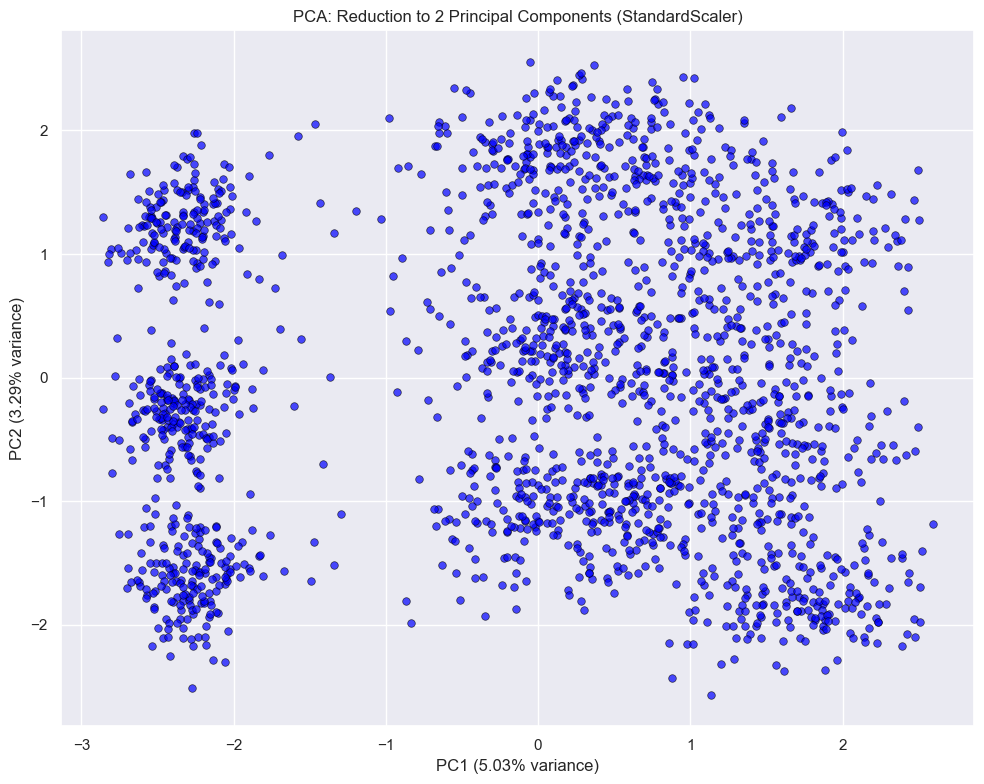

In [64]:
pca_standard_2d = plot_pca_2d(train_scaled_standard, 'StandardScaler', color='blue')

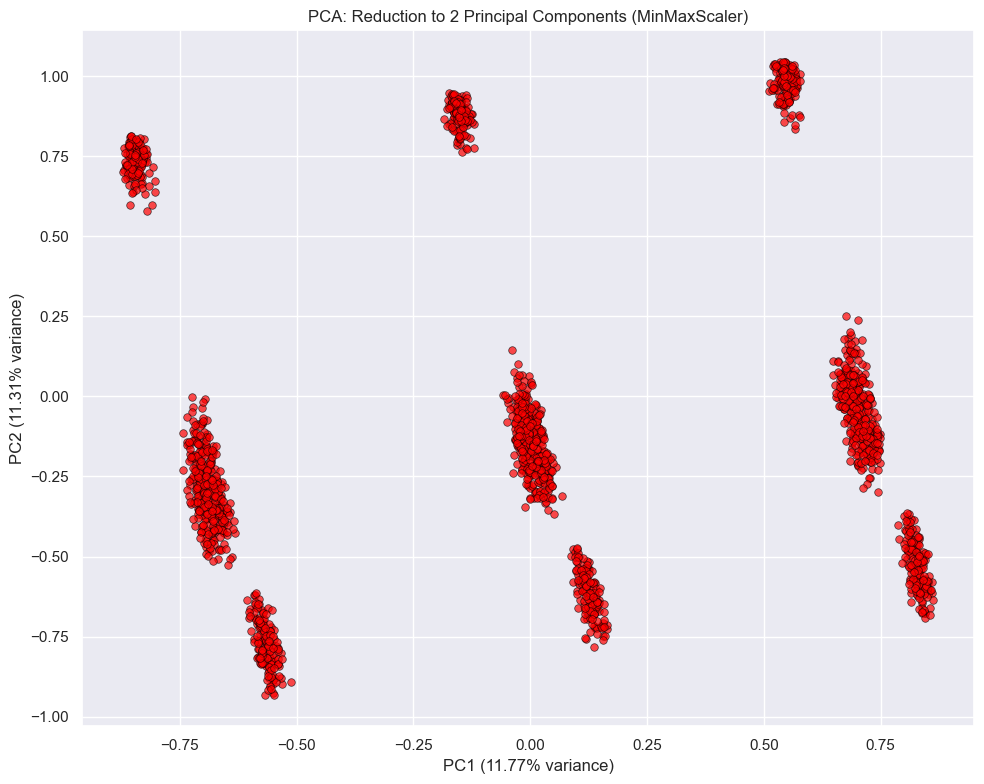

In [65]:
pca_minmax_2d = plot_pca_2d(train_scaled_minmax, 'MinMaxScaler', color='red')

#### Trying different values of n_components

Starting with 20 components, models were tested by using Silhouette Score. Then, again with 10, 7, 5, 4, 3 and 2 components. K-means and GMM achieved their best score with 2 components, and DBSCAN did the same with 4 components.

In [68]:
pca_minmax = PCA(n_components=4)
train_pca_minmax = pca_minmax.fit_transform(train_scaled_minmax)
test_pca_minmax = pca_minmax.transform(test_scaled_minmax)

pca_standard = PCA(n_components=4)
train_pca_standard = pca_standard.fit_transform(train_scaled_standard)
test_pca_standard = pca_standard.transform(test_scaled_standard)

## Training

### K-Means

In [71]:
from sklearn.cluster import KMeans, DBSCAN

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(train_pca_minmax)
kmeans_labels = kmeans.labels_

silhouette_kmeans = silhouette_score(train_pca_minmax, kmeans_labels)
print("Silhouette Score (KMeans):", silhouette_kmeans)
print("Inertia (KMeans):", kmeans.inertia_)

Silhouette Score (KMeans): 0.4146639984153698
Inertia (KMeans): 671.6277655916278


### DBSCAN

In [73]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(train_pca_minmax)
dbscan_labels = dbscan.labels_

# Ignoraring noisy clusters
if len(set(dbscan_labels)) > 1:  # Verifying there is more than oned cluster
    silhouette_dbscan = silhouette_score(train_pca_minmax, dbscan_labels)
    print("Silhouette Score (DBSCAN):", silhouette_dbscan)
else:
    print("DBSCAN detected only a cluster (or noise). Non-calculable Silhouette.")

# Number of clusters
print("Number of clusters (DBSCAN):", len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0))

Silhouette Score (DBSCAN): 0.8504172553100664
Number of clusters (DBSCAN): 24


### Gaussian Mixture Models

In [75]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(train_pca_minmax)

silhouette_gmm = silhouette_score(train_pca_minmax, gmm_labels)
print("Silhouette Score (GMM):", silhouette_gmm)

Silhouette Score (GMM): 0.39142456650537105


### Visualising Decision Boundaries

Finally, the minmax scaled set achieved better results than the standard scaled one.

In [78]:
pca_2d = PCA(n_components=2)
train_pca_2d_standard = pca_2d.fit_transform(train_pca_standard)
train_pca_2d_minmax = pca_2d.fit_transform(train_pca_minmax)

In [79]:
def plot_decision_boundaries(X, labels, model, title, h=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    if hasattr(model, 'predict'):
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.fit_predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=labels, edgecolor='k', cmap='viridis')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

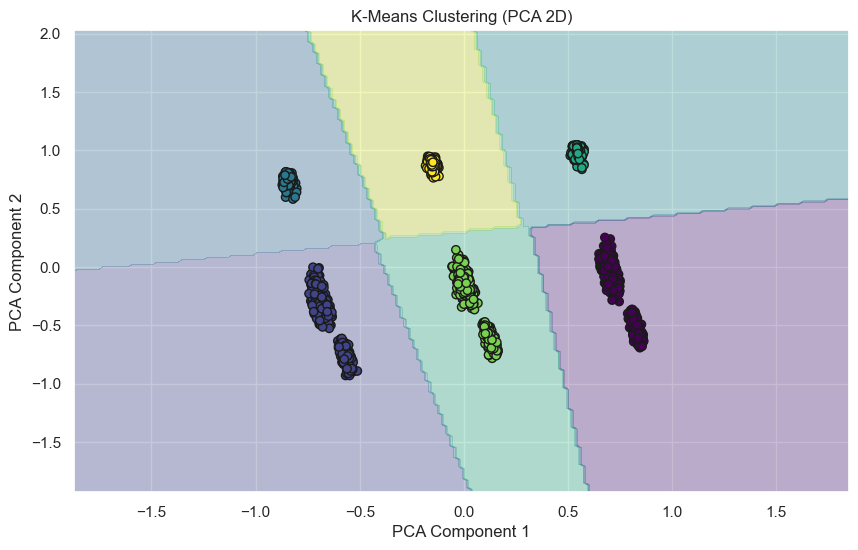

In [80]:
# K-Means 2D
kmeans_2d = KMeans(n_clusters=6, random_state=42)
kmeans_2d.fit(train_pca_2d_minmax)
kmeans_labels_2d = kmeans_2d.labels_

# Plot
plot_decision_boundaries(train_pca_2d_minmax, kmeans_labels_2d, kmeans_2d, title='K-Means Clustering (PCA 2D)')

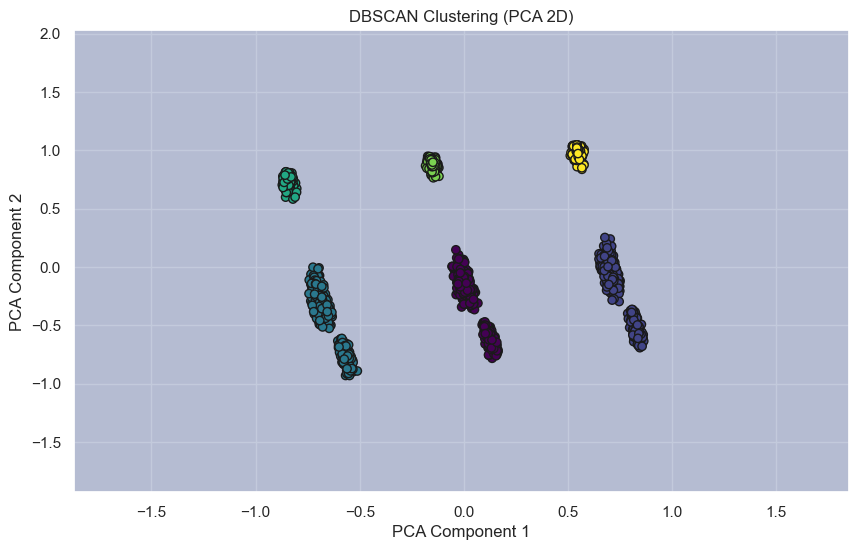

In [81]:
# DBSCAN 2D
dbscan_2d = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels_2d = dbscan_2d.fit_predict(train_pca_2d_minmax)

# Plot
plot_decision_boundaries(train_pca_2d_minmax, dbscan_labels_2d, dbscan_2d, title='DBSCAN Clustering (PCA 2D)')

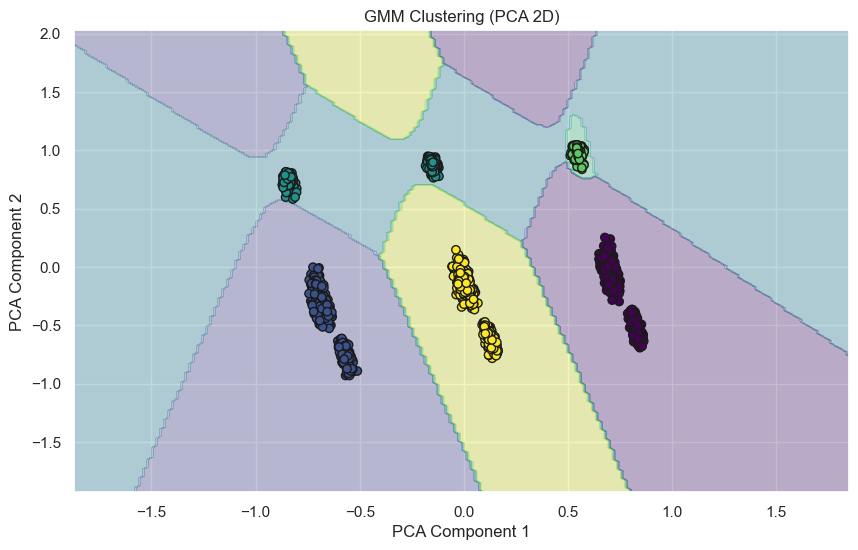

In [82]:
# GMM 2D
gmm_2d = GaussianMixture(n_components=5, random_state=42)
gmm_labels_2d = gmm_2d.fit_predict(train_pca_2d_minmax)

# Plot
plot_decision_boundaries(train_pca_2d_minmax, gmm_labels_2d, gmm_2d, title='GMM Clustering (PCA 2D)')

### Testing DBSCAN

DBSCAN seems to be the best model, so the test set was used in order to evaluate whether silhouette score is consistent or not, and to see other aspects, as well.

In [85]:
dbscan_test_labels = dbscan.fit_predict(test_pca_minmax)

if len(set(dbscan_test_labels)) > 1:
    silhouette_test = silhouette_score(test_pca_minmax, dbscan_test_labels)
    print("Silhouette Score (DBSCAN - Test):", silhouette_test)
else:
    print("DBSCAN detected only a cluster (or noise) in the test set.")

Silhouette Score (DBSCAN - Test): 0.831259192054877


In [86]:
unique, counts = np.unique(dbscan_test_labels, return_counts=True)
cluster_distribution = dict(zip(unique, counts))
print("Cluster distribution in test set:", cluster_distribution)

Cluster distribution in test set: {-1: 12, 0: 40, 1: 54, 2: 38, 3: 29, 4: 9, 5: 19, 6: 33, 7: 25, 8: 39, 9: 9, 10: 11, 11: 14, 12: 22, 13: 15, 14: 34, 15: 17, 16: 33, 17: 25, 18: 12, 19: 13}


In [87]:
n_outliers = np.sum(dbscan_test_labels == -1)
print("Number of outliers detected:", n_outliers)

Number of outliers detected: 12


#### Searching for hiperparameters

In [89]:
from sklearn.metrics import silhouette_score

eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 10]

best_config = None
best_silhouette = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(train_pca_minmax)
        
        if len(set(dbscan_labels)) > 1:
            silhouette = silhouette_score(train_pca_minmax, dbscan_labels)
            print(f"eps={eps}, min_samples={min_samples}, Silhouette={silhouette}")
            
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_config = (eps, min_samples)

print("Best Configuration:", best_config, "Best Silhouette Score:", best_silhouette)

eps=0.3, min_samples=3, Silhouette=0.8504172553100664
eps=0.3, min_samples=5, Silhouette=0.8504172553100664
eps=0.3, min_samples=10, Silhouette=0.8504172553100664
eps=0.5, min_samples=3, Silhouette=0.8504172553100664
eps=0.5, min_samples=5, Silhouette=0.8504172553100664
eps=0.5, min_samples=10, Silhouette=0.8504172553100664
eps=0.7, min_samples=3, Silhouette=0.22501364032503282
eps=0.7, min_samples=5, Silhouette=0.22501364032503282
eps=0.7, min_samples=10, Silhouette=0.22501364032503282
Best Configuration: (0.3, 3) Best Silhouette Score: 0.8504172553100664


It appears to be that different parameters don't change anything

#### Exploring clusters

In [92]:
def analyse_dbscan_clusters(data, labels, output_dir=None):
    # Create analysis dictionary to store results
    analysis_results = {}
    
    # Separate outliers and regular points
    outliers = data[labels == -1]
    regular_points = data[labels != -1]
    unique_clusters = np.unique(labels[labels != -1])
    
    # Basic statistics
    analysis_results['cluster_counts'] = pd.Series(labels).value_counts().sort_index()
    analysis_results['outlier_percentage'] = (len(outliers) / len(data)) * 100
    
    # Numeric features analysis
    numeric_cols = data.select_dtypes(include='number').columns
    categorical_cols = data.select_dtypes(include='object').columns
    
    # Statistical comparison between outliers and regular points
    stats_comparison = pd.DataFrame()
    for col in numeric_cols:
        # Perform Mann-Whitney U test
        statistic, p_value = stats.mannwhitneyu(
            outliers[col], regular_points[col], alternative='two-sided'
        )
        
        stats_comparison.loc[col, 'p_value'] = p_value
        stats_comparison.loc[col, 'outlier_mean'] = outliers[col].mean()
        stats_comparison.loc[col, 'regular_mean'] = regular_points[col].mean()
        stats_comparison.loc[col, 'percent_difference'] = (
            (outliers[col].mean() - regular_points[col].mean()) 
            / regular_points[col].mean() * 100
        )
    
    analysis_results['statistical_comparison'] = stats_comparison
    
    # Categorical features analysis
    cat_analysis = {}
    for col in categorical_cols:
        cat_analysis[col] = {
            'outliers': outliers[col].value_counts(normalize=True),
            'regular': regular_points[col].value_counts(normalize=True)
        }
    
    analysis_results['categorical_analysis'] = cat_analysis
    
    # Visualization
    # 1. Numeric Features Distribution
    num_features = len(numeric_cols)
    cols = 3
    rows = (num_features // cols) + (num_features % cols > 0)
    
    plt.figure(figsize=(15, rows * 4))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)
        # Plot density curves
        sns.kdeplot(data=regular_points[col], label='Regular', color='blue', 
                   fill=True, alpha=0.3)
        sns.kdeplot(data=outliers[col], label='Outliers', color='red', 
                   fill=True, alpha=0.3)
        
        # Add mean lines
        plt.axvline(regular_points[col].mean(), color='blue', linestyle='--', 
                   alpha=0.5, label='Regular Mean')
        plt.axvline(outliers[col].mean(), color='red', linestyle='--', 
                   alpha=0.5, label='Outlier Mean')
        
        plt.title(f'{col}\n(p-value: {stats_comparison.loc[col, "p_value"]:.2e})')
        plt.legend()
    
    plt.tight_layout()
    if output_dir:
        plt.savefig(f'{output_dir}/numeric_distributions.png')
    plt.show()
    
    return analysis_results

In [93]:
def print_analysis_summary(analysis_results):
    print("=== DBSCAN Clustering Analysis Summary ===\n")
    
    print("Cluster Distribution:")
    print(f"Total clusters found: {len(analysis_results['cluster_counts']) - 1}")  # -1 for outliers
    print(f"Outlier percentage: {analysis_results['outlier_percentage']:.2f}%\n")
    
    print("Significant Feature Differences (p < 0.05):")
    stat_comparison = analysis_results['statistical_comparison']
    significant_features = stat_comparison[stat_comparison['p_value'] < 0.05]
    
    for feature in significant_features.index:
        print(f"\n{feature}:")
        print(f"  - Mean difference: {significant_features.loc[feature, 'percent_difference']:.2f}%")
        print(f"  - p-value: {significant_features.loc[feature, 'p_value']:.2e}")

C:\Users\David\AppData\Local\Temp\ipykernel_1196\1216864980.py:30: RuntimeWarning: invalid value encountered in scalar divide
  (outliers[col].mean() - regular_points[col].mean())
C:\Users\David\AppData\Local\Temp\ipykernel_1196\1216864980.py:30: RuntimeWarning: invalid value encountered in scalar divide
  (outliers[col].mean() - regular_points[col].mean())
C:\Users\David\AppData\Local\Temp\ipykernel_1196\1216864980.py:58: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=outliers[col], label='Outliers', color='red',
C:\Users\David\AppData\Local\Temp\ipykernel_1196\1216864980.py:58: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=outliers[col], label='Outliers', color='red',
C:\Users\David\AppData\Local\Temp\ipykernel_1196\1216864980.py:58: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_si

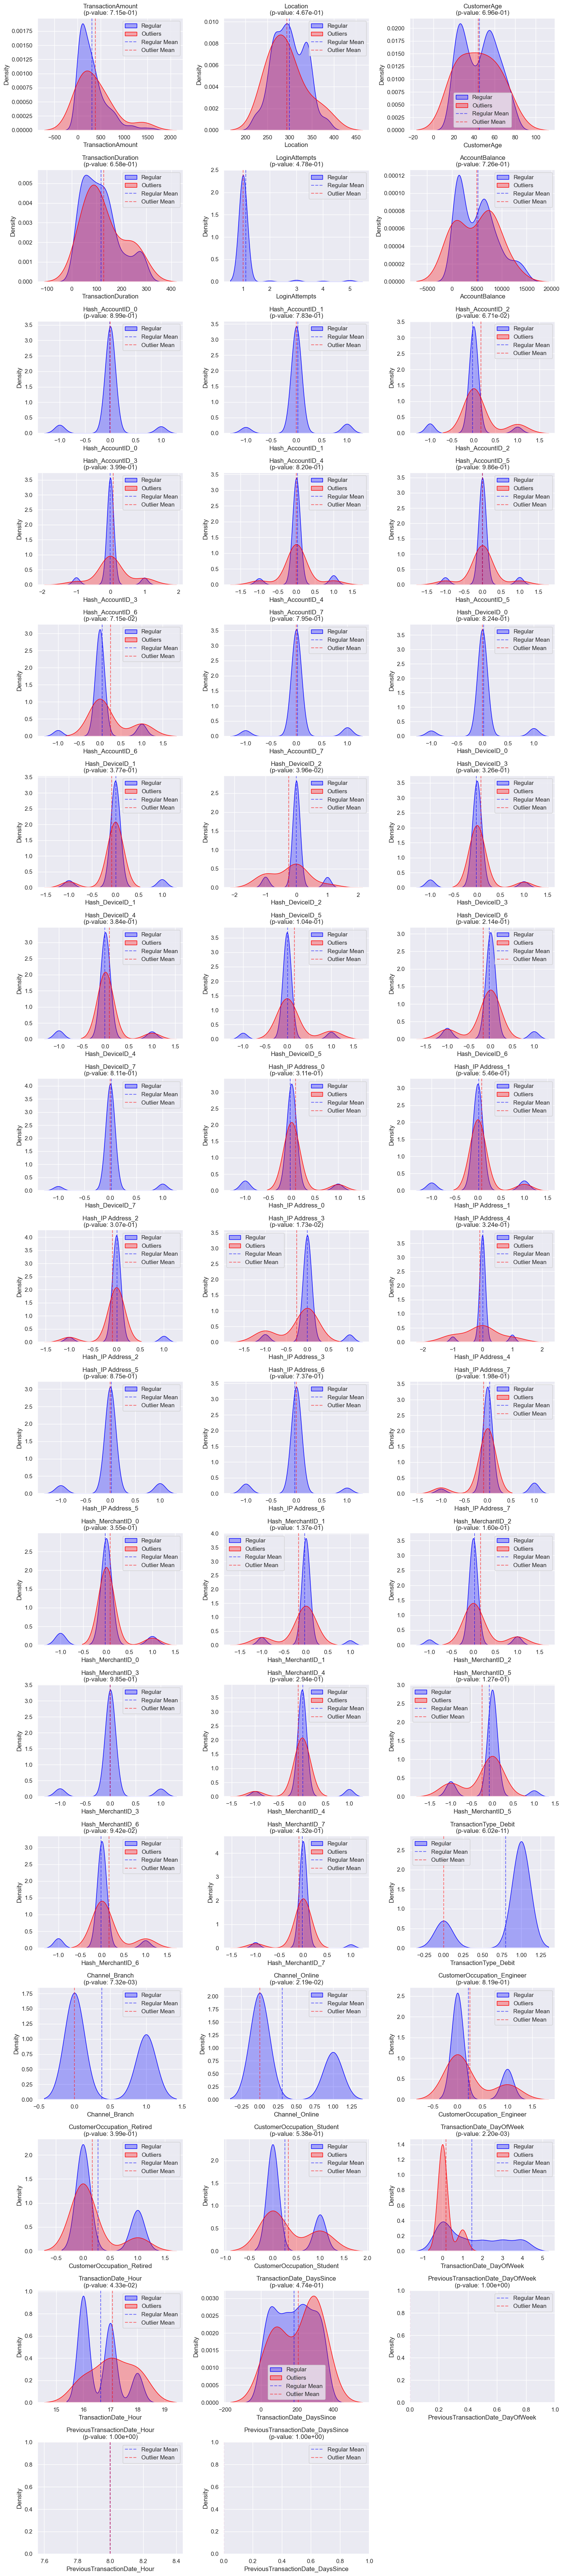

=== DBSCAN Clustering Analysis Summary ===

Cluster Distribution:
Total clusters found: 20
Outlier percentage: 2.39%

Significant Feature Differences (p < 0.05):

Hash_DeviceID_2:
  - Mean difference: 12175.00%
  - p-value: 3.96e-02

Hash_IP Address_3:
  - Mean difference: 12175.00%
  - p-value: 1.73e-02

TransactionType_Debit:
  - Mean difference: -100.00%
  - p-value: 6.02e-11

Channel_Branch:
  - Mean difference: -100.00%
  - p-value: 7.32e-03

Channel_Online:
  - Mean difference: -100.00%
  - p-value: 2.19e-02

TransactionDate_DayOfWeek:
  - Mean difference: -88.67%
  - p-value: 2.20e-03

TransactionDate_Hour:
  - Mean difference: 2.65%
  - p-value: 4.33e-02


In [94]:
# Analyse the clusters
analysis_results = analyse_dbscan_clusters(
    test_data, 
    dbscan_test_labels,
)

# Print the summary
print_analysis_summary(analysis_results)

#### Feature Analysis

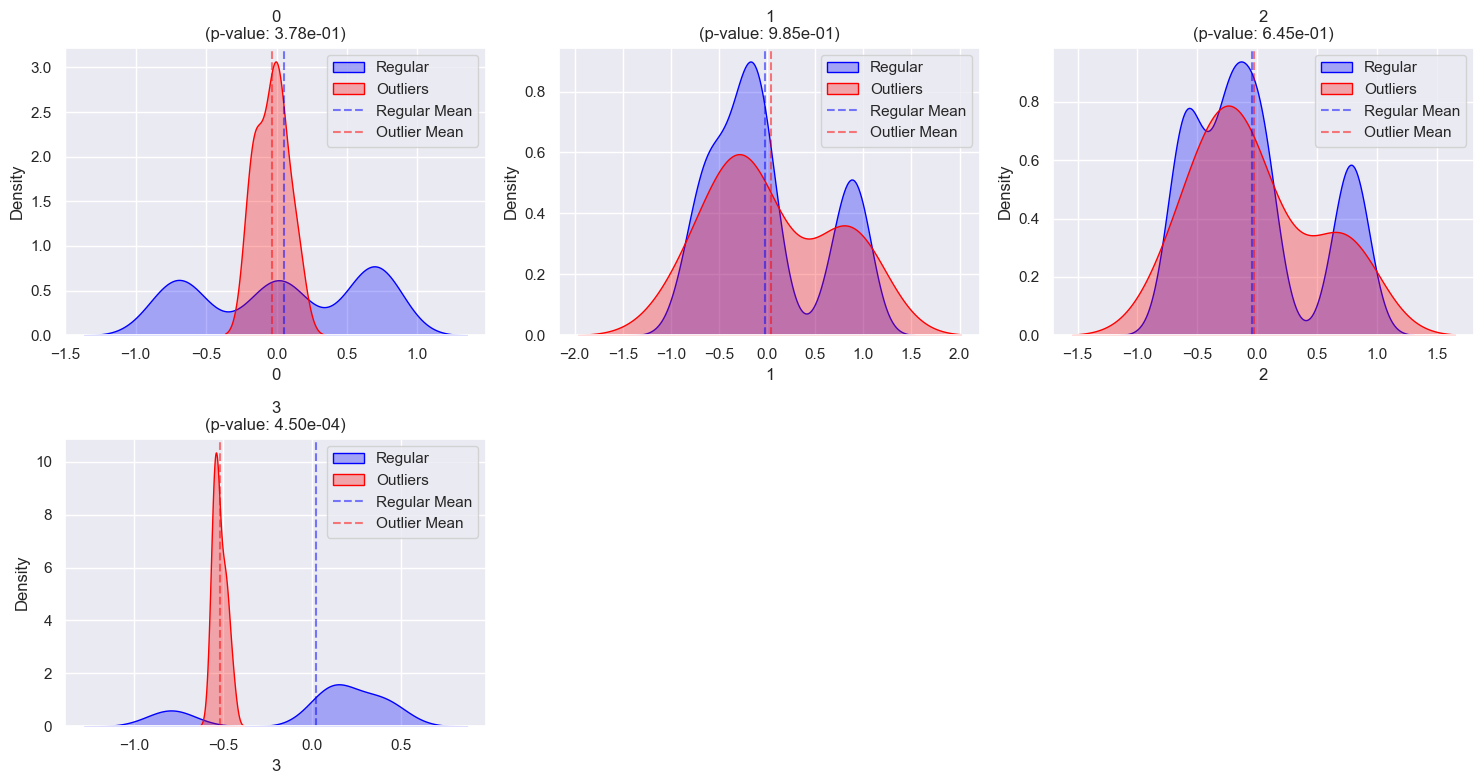

,p_value,outlier_mean,regular_mean,percent_difference
3,0.000450,-0.521145,0.020564,-2634.307450
0,0.378057,-0.033431,0.049999,-166.864050
2,0.644550,-0.027189,-0.047531,-42.797760
1,0.984764,0.043993,-0.020146,-318.372985


In [102]:
data = pd.DataFrame(test_pca_minmax)
labels = dbscan_test_labels

# Separar outliers y clusters regulares
outliers = data[labels == -1]
regular_points = data[labels != -1]

# Num features
numeric_cols = data.select_dtypes(include='number').columns
categorical_cols = data.select_dtypes(include='object').columns

# Num comparison
stats_comparison = pd.DataFrame()
for col in numeric_cols:
    stat, p_value = stats.mannwhitneyu(outliers[col], regular_points[col], alternative='two-sided')
    stats_comparison.loc[col, 'p_value'] = p_value
    stats_comparison.loc[col, 'outlier_mean'] = outliers[col].mean()
    stats_comparison.loc[col, 'regular_mean'] = regular_points[col].mean()
    stats_comparison.loc[col, 'percent_difference'] = (
        (outliers[col].mean() - regular_points[col].mean()) / regular_points[col].mean() * 100
    )

# Visualisation: Num distributions
num_features = len(numeric_cols)
cols = 3
rows = (num_features // cols) + (num_features % cols > 0)
plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.kdeplot(data=regular_points[col], label='Regular', color='blue', fill=True, alpha=0.3)
    sns.kdeplot(data=outliers[col], label='Outliers', color='red', fill=True, alpha=0.3)
    plt.axvline(regular_points[col].mean(), color='blue', linestyle='--', alpha=0.5, label='Regular Mean')
    plt.axvline(outliers[col].mean(), color='red', linestyle='--', alpha=0.5, label='Outlier Mean')
    plt.title(f'{col}\n(p-value: {stats_comparison.loc[col, "p_value"]:.2e})')
    plt.legend()

plt.tight_layout()
plt.show()

# Resumen del análisis
stats_comparison.sort_values('p_value', inplace=True)
stats_comparison


Component 3 shows a significant difference between outliers and regular points. This probably means that it is of great importance in order to differentiate between legitimate transaction from fraudulent ones.

#### Analysing Component 3

## New Steps

Determination of fraud samples would be achieved by analysing component 3. Violinplots and other tools could be used in order to find a clear and robust way to meet this objective.